In [6]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
x,y = make_circles(n_samples=150, noise=0.1, random_state=1)

In [13]:
x.shape,y.shape

((150, 2), (150,))

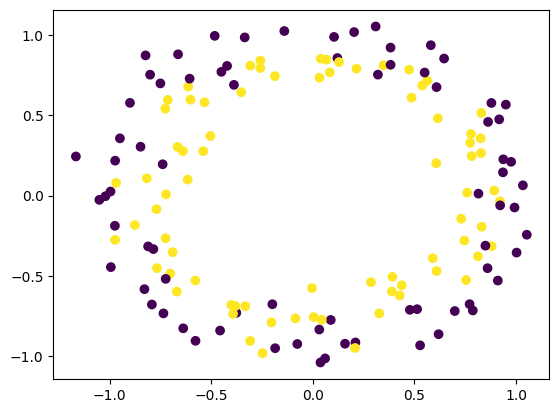

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])

In [20]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3500,verbose=0)

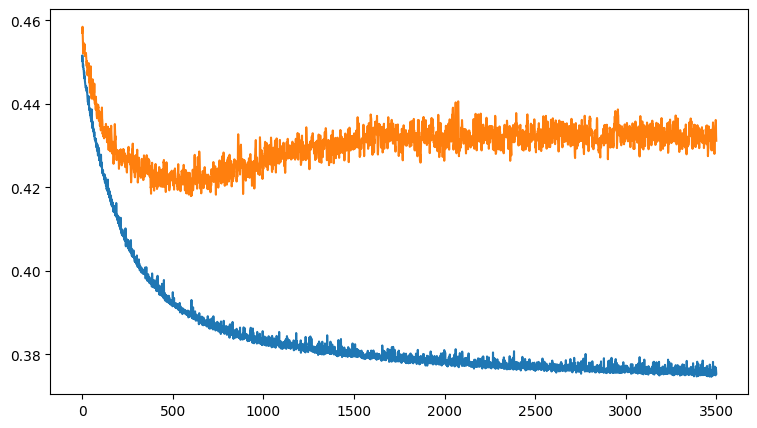

In [21]:
plt.figure(figsize=(9,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


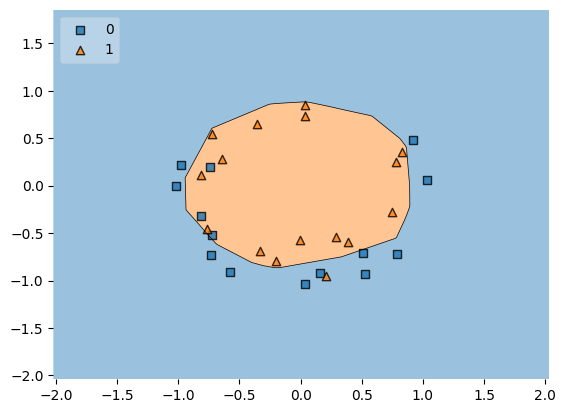

In [22]:
plot_decision_regions(x_test,y_test.ravel(),clf=model, legend=2)
plt.show()

## **Early Stoping**

In [36]:
model2 = Sequential()
model2.add(Dense(256,input_dim=2,activation='relu'))
model2.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [39]:
callback = EarlyStopping(monitor='val_loss',
                         patience=20,
                         min_delta=0.00001,
                         verbose=1,
                         mode='auto',
                         baseline=None,
                         restore_best_weights=False)

In [40]:
hist = model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4954 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 2/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4752 - loss: 0.6921 - val_accuracy: 0.5333 - val_loss: 0.6962
Epoch 3/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5100 - loss: 0.6900 - val_accuracy: 0.5333 - val_loss: 0.6977
Epoch 4/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5263 - loss: 0.6870 - val_accuracy: 0.5667 - val_loss: 0.6987
Epoch 5/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5252 - loss: 0.6872 - val_accuracy: 0.5333 - val_loss: 0.6999
Epoch 6/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5421 - loss: 0.6851 - val_accuracy: 0.5333 - val_loss: 0.7013
Epoch 7/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5012 - loss: 0.6862 - val_accuracy: 0.5333 - val_loss: 0.7022
Epoch 8/3500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4690 - loss: 0.6930 - val_accuracy: 0.5333 - v

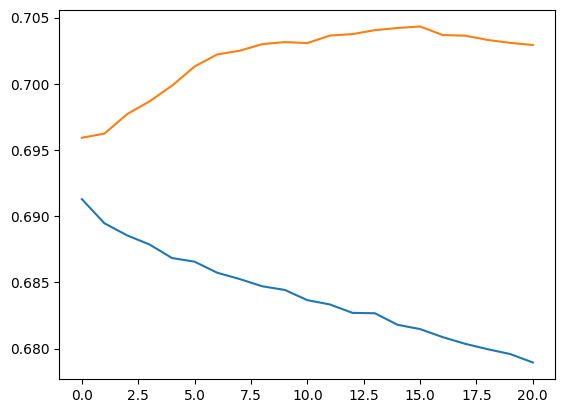

In [42]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label="val loss")
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


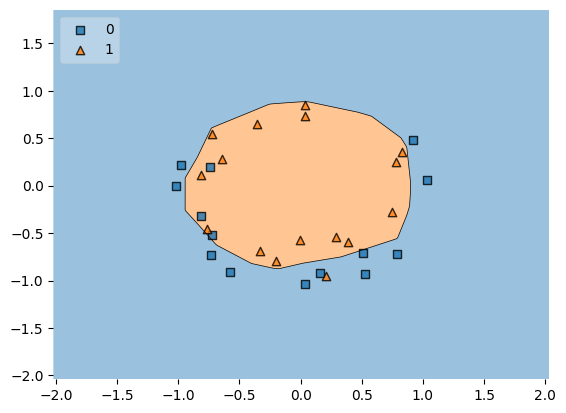

In [43]:
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()